# Challenge Set 2 (Luther)
Topic:        Learn Pandas using Movie Data

Date:         01/16/2016

Name:         Kenneth Myers

Worked with:  NA

## Challenge 1

### Please read before continuing:

In my code you will notice that for every challenge I have called:

```
movie_df = read_file("2013_movies.csv")
```

I was having some sort of memory issue with ipython where certain columns in the dataframe would go completely out of order. I tested this and the issue would persist unless Iread the CSV file again. However the error would *NOT* return if I commented out the line to read it. I have decided to leave the code in for each of the challenges below to lower the chance of the error returning.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


def read_file(filename):
    with open(filename) as file:
        df = pd.read_csv(file)
        
    return df

movie_df = read_file("2013_movies.csv")
print(movie_df.head())


                             Title     Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000           424668047   
1                       Iron Man 3  200000000           409013994   
2                           Frozen  150000000           400738009   
3                  Despicable Me 2   76000000           368061265   
4                     Man of Steel  225000000           291045518   

                    Director Rating  Runtime          ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00  
1                Shane Black  PG-13      129  2013-05-03 00:00:00  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00  


/Users/kenn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text xticklabel objects>)

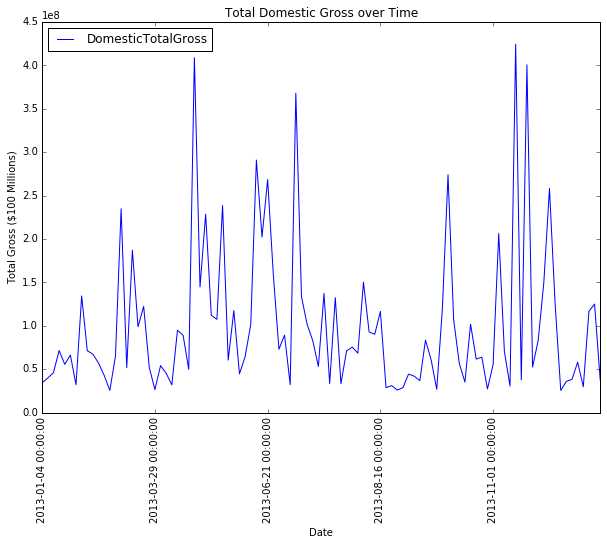

In [14]:
movie_df = read_file("2013_movies.csv")
gross_over_time = movie_df[["ReleaseDate", "DomesticTotalGross"]]
#print(movie_df)
gross_over_time.index = movie_df['ReleaseDate']
gross_over_time.sort_index(inplace = True)
#gross_over_time = gross_over_time.cumsum()   <--- add to get cum domestic gross over time

#print(gross_over_time)

gross_over_time.plot(figsize=(10,7))
plt.title("Total Domestic Gross over Time")
plt.xlabel('Date')
plt.ylabel('Total Gross ($100 Millions)')
plt.xticks(rotation='vertical')  

## Challenge 2

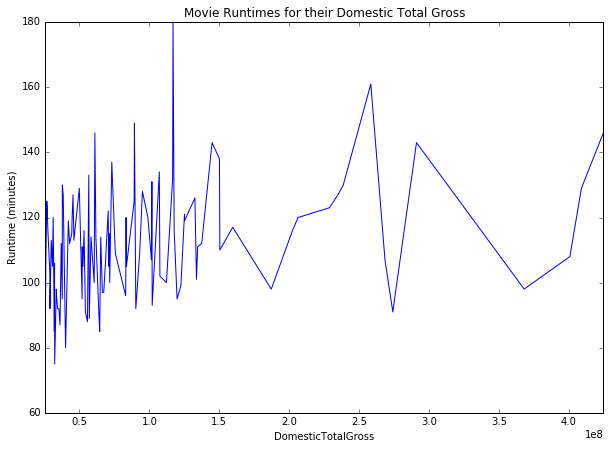

In [11]:
movie_df = read_file("2013_movies.csv")


runtime_domesticgross = movie_df["Runtime"]
runtime_domesticgross.index = movie_df["DomesticTotalGross"]
runtime_domesticgross.sort_index(inplace = True)

#print(runtime_domesticgross)

plt.figure(figsize=(10,7))
plt.title("Movie Runtimes for their Domestic Total Gross")
plt.xlabel('Domestic Total Gross ($100 millions)')
plt.ylabel('Runtime (minutes)')
runtime_domesticgross.plot()


## Challenge 3

In [8]:
#Group your data by Rating and find 
#the average runtime and domestic total 
#gross at each level of Rating.

movie_df = read_file("2013_movies.csv")

by_rating = movie_df.groupby("Rating")
by_rating[["DomesticTotalGross", "Runtime"]].mean()
#print(movie_df)



,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


## Challenge 4

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


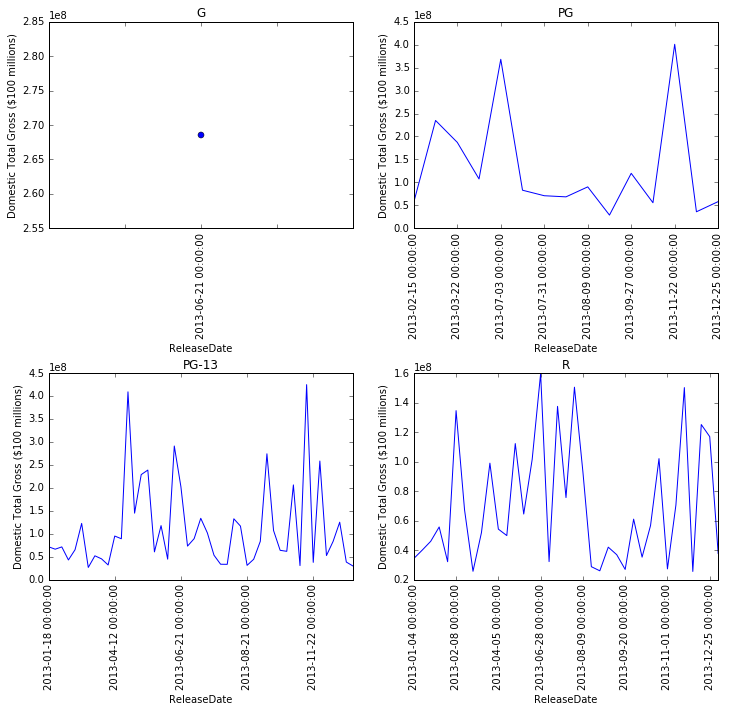

In [5]:
#Make one figure with (N=the number of MPAA ratings there are) 
#subplots, and in each plot the release date vs the domestic total gross.

movie_df = read_file("2013_movies.csv")

g_rating = movie_df[movie_df["Rating"] == "G"]
pg_rating = movie_df[movie_df["Rating"] == "PG"]
pg13_rating = movie_df[movie_df["Rating"] == "PG-13"]
r_rating = movie_df[movie_df["Rating"] == "R"]

ratings_list = [[g_rating, g_rating.iloc[0]["Rating"]], 
                [pg_rating, pg_rating.iloc[0]["Rating"]],
                [pg13_rating, pg13_rating.iloc[0]["Rating"]],
                [r_rating, r_rating.iloc[0]["Rating"]]
               ]

fig, axes = plt.subplots(figsize = (12,10), nrows=2, ncols=2)
fig.subplots_adjust(hspace=.7)

i,j = 0,0

for rating in ratings_list:
    rating[0] = rating[0][["ReleaseDate", "DomesticTotalGross"]]
    rating[0] = rating[0].sort_values(by='ReleaseDate')
    #print(rating[0])
    if i == 0 and j == 0:
        rating[0].plot(style = 'o', ax = axes[i,j], x = "ReleaseDate", y = "DomesticTotalGross")
    else:
        rating[0].plot(ax = axes[i,j], x = "ReleaseDate", y = "DomesticTotalGross")
    
    axes[i,j].set_title(rating[1])
    axes[i,j].set_ylabel('Domestic Total Gross ($100 millions)')
    axes[i,j].legend_.remove()
    
    for tick in axes[i,j].get_xticklabels():
        tick.set_rotation("vertical")
    
    if j == 0:
        j += 1
    elif j == 1:
        j -= 1
        i += 1


 

## Challenge 5

In [12]:
#What director in your dataset has the highest gross per movie?
movie_df = read_file("2013_movies.csv")

movie_df = movie_df.replace(np.nan, -1)
#print(movie_df)

by_director = movie_df.groupby("Director")
by_director = by_director[["DomesticTotalGross"]].mean()
by_director = by_director.sort_values(by='DomesticTotalGross', ascending = False)
display(by_director.iloc[:5])

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518


## Challenge 6

###### Equation for Standard error of the mean (SEM):

                        s/rad(n)
                    
        where s = standard deviation
              n = size of the sample
              


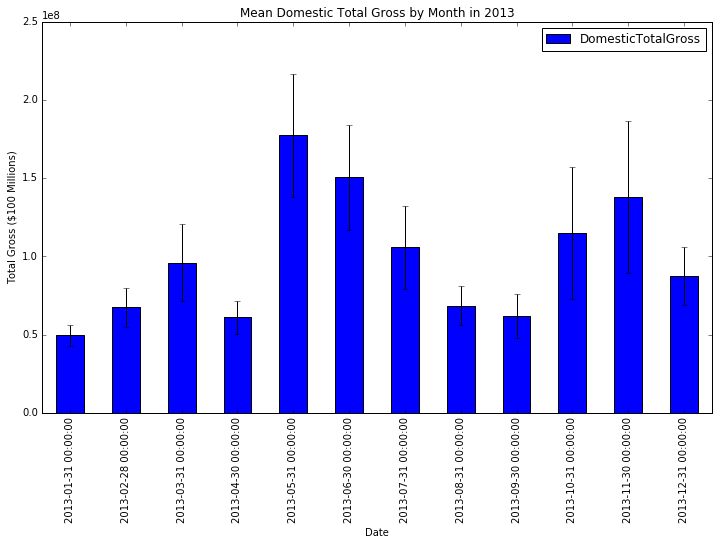

In [13]:
#Bin your dataset into months and make a bar graph 
#of the mean domestic total gross by month. 
#Error bars will represent the standard error of the mean.

movie_df = read_file("2013_movies.csv")

movie_df['ReleaseDate'] = movie_df['ReleaseDate'].astype('datetime64[ns]')

by_month = movie_df[["DomesticTotalGross"]]
by_month.index = movie_df["ReleaseDate"]
by_month_mean = by_month.resample("M")     #Default how parameter is 'mean'
#print(by_month_mean)

by_month_count = by_month.resample("M", how='count')
#print(by_month_count)

by_month_std = by_month.resample("M", how=np.std)
#print(by_month_std)

by_month_SEM = by_month_std["DomesticTotalGross"]/np.sqrt(by_month_count["DomesticTotalGross"])
#print(by_month_SEM)



by_month_mean.plot(yerr=by_month_SEM, kind='bar', figsize=(12,7))
plt.title("Mean Domestic Total Gross by Month in 2013")
plt.xlabel('Date')
plt.ylabel('Total Gross ($100 Millions)')
